In [28]:
import tmdbsimple as tmdb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


tmdb.API_KEY = "60dde32875c0d3c5679496aba9fb3465"
tmdb.REQUESTS_TIMEOUT = 10


In [29]:
df = pd.DataFrame(columns=['Title', 'Budget', 'Rating'])
URL = "http://files.tmdb.org/p/exports/movie_ids_04_01_2023.json.gz"
dfidlist = pd.read_json(URL, compression='gzip', lines=True)

for i in dfidlist['id'].head(500):
    movie = tmdb.Movies(i)
    response = movie.info()
    tempdf = pd.DataFrame([[movie.title, movie.budget, movie.vote_average]], columns=[
                          'Title', 'Budget', 'Rating'])
    df = pd.concat([df, tempdf], ignore_index=True)

df['Budget'] = df['Budget'].astype(float)
df['Budget'] = df['Budget'].replace(0, np.nan)
df['Rating'] = df['Rating'].replace(0, np.nan)

df.count()

df = df.dropna()

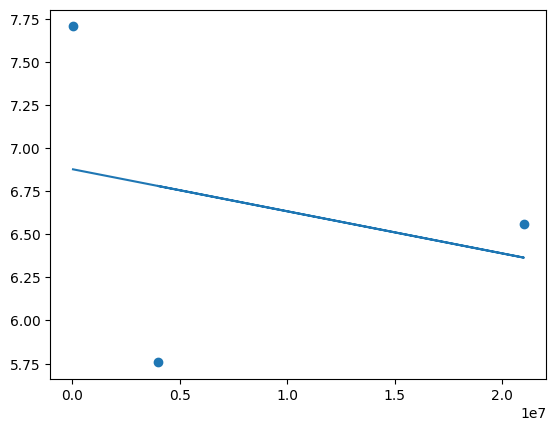

In [30]:

x = df['Budget']
y = df['Rating']

plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)

plt.plot(x, p(x))